In [1]:
import pandas as pd
import importlib
import fourDEnVar_engine
importlib.reload(fourDEnVar_engine)
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import numpy as np
import netCDF4 as nc
from matplotlib.lines import Line2D
import seaborn as sns
import iris
import iris.quickplot as qplt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.2f}".format
filepath='/gws/nopw/j04/jules/ndouglas/FluxNet/u-dr501/da_files/'
filepath_plots='/gws/nopw/j04/jules/ndouglas/FluxNet/u-dr501/plots/'
parameter_names=['alpha_io','neff_io','omega_io','t_low','t_upp','g1_stomata_io']
obs_twin_index=11
obs_tag='realobs'
nens=20
output_unit=r'kgm$^{-2}$s$^{-1}$'
years=np.arange(1992,2010)
mostyears=np.arange(1992,2013)
validyears=np.arange(2010,2013)

def RMSE(array1, array2):
    rmsediff=(array1-array2)**2.0
    rmsemean=np.mean(rmsediff)
    rmse=rmsemean**0.5
        
    return rmse

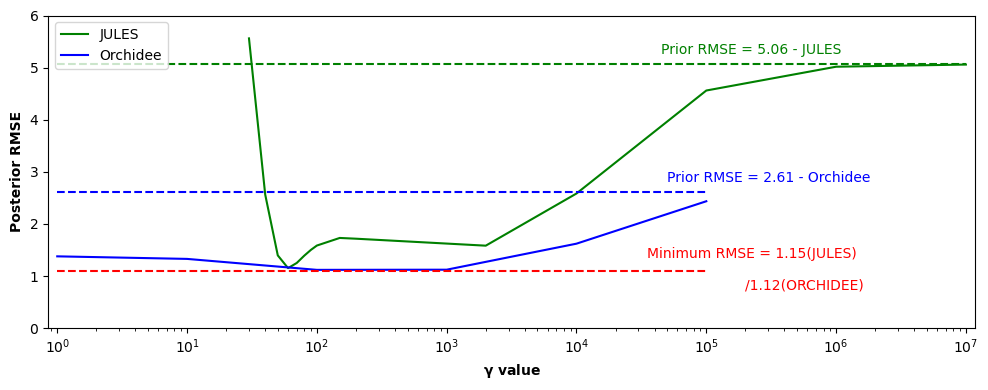

In [3]:
SIZESofGAMMA=[30,40,50,60,70,80,90,100,150,200,2000,10000,100000,1000000,10000000]
hxbar_cube=iris.load_cube(filepath+'hxbar_cube_US_Ha1_GPP_20.nc')
np.save('/home/users/ndouglas/roses/u-dr501/bin/hxbar_cube_US_Ha1_GPP_20.nc',hxbar_cube)
limited_hxbar=hxbar_cube.extract(iris.Constraint(year=years))
y_cube=iris.load_cube(filepath+'y_cube_US_Ha1_GPP.nc') # might need if statement for twin experiment, maybe not relevanthere
limited_y=y_cube.extract(iris.Constraint(year=years))
rmse_prior= RMSE(limited_y.data,limited_hxbar.data)
rmse_analysis_gamma=[]
residual_norm=[]
prior_norm=[]

for SIZEG in SIZESofGAMMA:
    #hxa_cube=hxbar_cube.copy()
    xa=np.load(filepath+'xa_'+obs_tag+'_US_Ha1_GPP_20_gammaval'+str(SIZEG)+'_1992-2009.npy')
    hxa_cube=iris.load_cube(filepath+'hxa_cube_'+obs_tag+'_US_Ha1_DAwithGPP_outputofGPP_20_gammaval'+str(SIZEG)+'_1992-2009.nc')
    limited_hxa=hxa_cube.extract(iris.Constraint(year=years))
    rmse_analysis_gamma.append(RMSE(limited_y.data,limited_hxa.data))
    residual_norm.append(np.dot((limited_y.data-limited_hxa.data).T,limited_y.data-limited_hxa.data))
    prior_norm.append(np.dot(xa.T,xa))
#vector of dogleash values
dogleash_orc=[1,10,100,1000,10000,100000]

RMSD_orc=[1.3776353035655389,
 1.3285084209304916,
 1.1181856456516406,
 1.1213520851375642,
 1.6208430151819413,
 2.4349982378444754]

#Prior RMSD
prior_orc=round(2.6145242480898183,2)
#prior_jules=8.74
prior_jules=round(rmse_prior,2)
#Figure

fig = plt.figure(figsize=(10,4))
plt.plot(SIZESofGAMMA,rmse_analysis_gamma,label='JULES',color='green')
plt.plot(dogleash_orc,RMSD_orc,'b-',label='Orchidee')
#plt.scatter(dogleash_orc,RMSD_orc,marker='.',color='black',lw=5)
plt.hlines(xmin=1,xmax=dogleash_orc[-1],y=prior_orc,color='blue',ls='--')
plt.hlines(xmin=1,xmax=SIZESofGAMMA[-1],y=prior_jules,color='green',ls='--')
plt.hlines(xmin=1,xmax=dogleash_orc[-1],y=1.1,color='red',ls='--')
#plt.vlines(ymin=-1,ymax=10,x=10,color='red',ls='-')
plt.text(x=50000,y=prior_orc+0.2,s='Prior RMSE = '+str(prior_orc)+' - Orchidee',color='blue')
plt.text(x=45000,y=prior_jules+0.2,s='Prior RMSE = '+str(prior_jules)+' - JULES',color='green')
plt.text(x=35000,y=1.15+0.2,s='Minimum RMSE = '+str(round(np.min(rmse_analysis_gamma),2))+'(JULES)',color='red')
plt.text(x=200000,y=1.15-0.4,s='/1.12(ORCHIDEE)',color='red')
#plt.text(x=2,y=5,s='Outside \nParameter \nBoundary',color='red')
plt.ylabel('Posterior RMSE',fontweight='bold')
plt.xlabel(r'${\bf \gamma}$ value',fontweight='bold')
plt.xscale('log')
plt.ylim(0,6)
plt.margins(x=0.01)
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.15, 0.9))
plt.legend()
#plt.savefig(filepath_plots+'/dogleashRMSD.pdf')
plt.savefig('/home/users/ndouglas/roses/u-dr501/bin/dogleashRMSD.pdf')


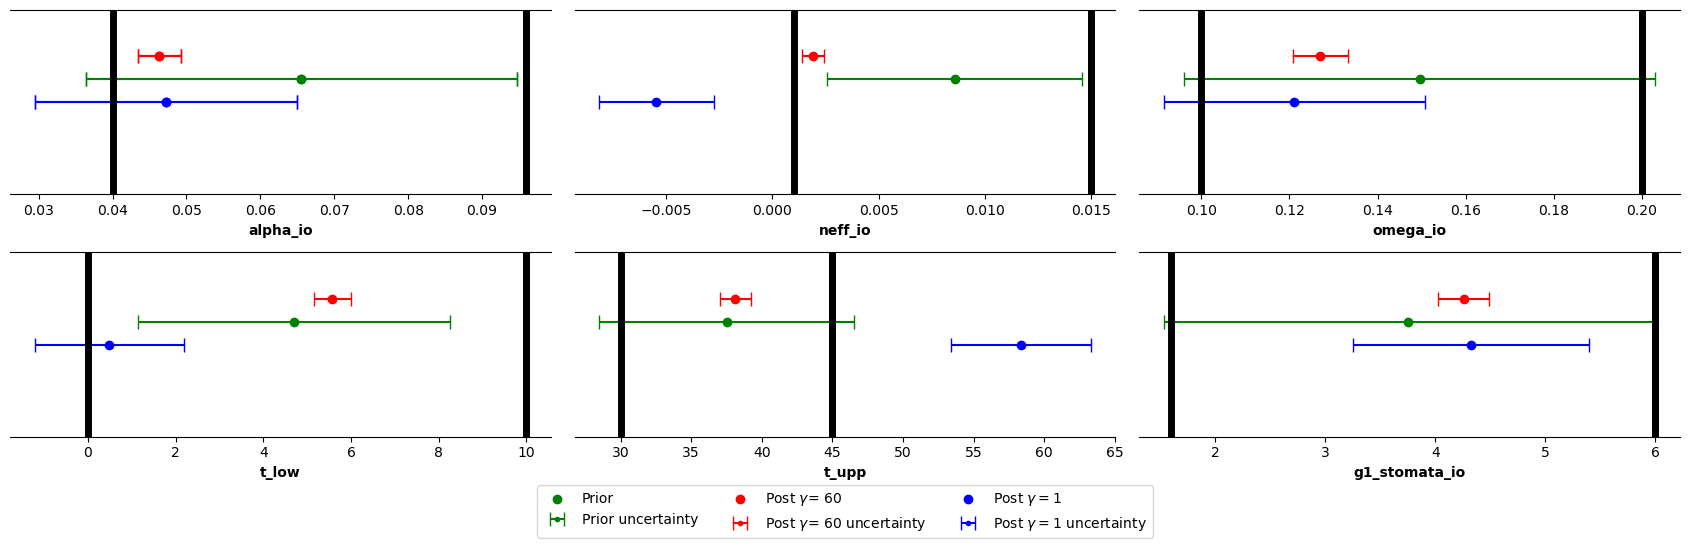

In [4]:
# Read param info
GAMMAVAL=60
priors=[0.068,0.008,0.15,5.0,37.5,3.8]
lower_bounds=[0.04,0.001,0.1,0.0,30.0,1.6]
upper_bounds=[0.096,0.015,0.2,10.0,45.0,6.0]
Xb=np.load(filepath+'Xb_20.npy')
xbar=np.load(filepath+'xb_20.npy')
xa=np.load(filepath+'xa_realobs_US_Ha1_GPP_20_gammaval'+str(GAMMAVAL)+'_1992-2009.npy')
Xa=np.load(filepath+'Xa_realobs_US_Ha1_GPP_20_gammaval'+str(GAMMAVAL)+'_1992-2009.npy')
true_params=Xb[:,obs_twin_index]

if obs_tag == 'realobs':
    xa_orig=np.load(filepath+'xa_orig_realobs_US_Ha1_GPP_20_1992-2009.npy')
    Xa_orig=np.load(filepath+'Xa_orig_realobs_US_Ha1_GPP_20_1992-2009.npy')

p_min=lower_bounds
p_max=upper_bounds
p_id=parameter_names
p_prior=xbar
p_ens=Xb.T
p_post=xa

p_post_No_dl=xa_orig
Xa_No_dl=Xa_orig

fig, ax = plt.subplots(nrows=2, ncols=3,sharey=False,sharex=False,figsize=(17,5))
stdtime=2
ax=ax.flatten()
i=0
a=ax[0].scatter(y=0.5,x=p_prior[0],color='green',marker='o',lw=1)
b=ax[i].errorbar(p_prior[i], 0.5, xerr=stdtime*np.std(p_ens[:,i],axis=0), marker=".",linestyle="none",color='green',label='Prior uncertainty',capsize = 5)
c=ax[0].scatter(y=0.6,x=p_post[0],color='red',marker='o',lw=1,label='Post DL=100')
d=ax[i].errorbar(p_post[i], 0.6, xerr=stdtime*np.std(Xa[i,:],axis=0), marker=".",linestyle="none",color='red',label='Post DL=100 uncertainty',capsize = 5)
e=ax[0].scatter(y=0.4,x=p_post_No_dl[0],color='blue',marker='o',lw=1,label='Post No DL')
f=ax[i].errorbar(p_post_No_dl[i], 0.4, xerr=stdtime*np.std(Xa_No_dl[i,:],axis=0), marker=".",linestyle="none",color='blue',label='Post No DL uncertainty',capsize = 5)


for i in range(len(p_min)):
    maxg=1
    ax[i].scatter(y=0.5,x=p_prior[i],color='green',marker='o',lw=1)
    ax[i].errorbar(p_prior[i], 0.5, xerr=stdtime*np.std(p_ens[:,i],axis=0), marker=".",linestyle="none",color='green',capsize = 5)
    ax[i].scatter(y=0.6,x=p_post[i],color='red',marker='o',lw=1)
    ax[i].errorbar(p_post[i], 0.6, xerr=stdtime*np.std(Xa[i,:],axis=0), marker=".",linestyle="none",color='red',capsize = 5)

    ax[i].scatter(y=0.4,x=p_post_No_dl[i],color='blue',marker='o',lw=1)
    ax[i].errorbar(p_post_No_dl[i], 0.4, xerr=stdtime*np.std(Xa_No_dl[i,:],axis=0), marker=".",linestyle="none",color='blue',capsize = 5)

    #ax[i].set_ylim(0,1)
    ax[i].set_ylim(0,0.8)
    ax[i].vlines(x=p_min[i], ymin=0, ymax=ax[i].get_ylim()[1], color='black', lw=5)
    ax[i].vlines(x=p_max[i], ymin=0, ymax=ax[i].get_ylim()[1], color='black', lw=5)
    #ax[i].vlines(x=p_min[i],ymin=0,ymax=maxg,color='black',ls='-',lw=5)

    ax[i].vlines(x=p_max[i],ymin=0,ymax=maxg,color='black',ls='-',lw=5)

    ax[i].set_xlabel(p_id[i],fontweight='bold')
    ax[i].margins(y=0)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_yticks([])
    #ax[i].set_yticks([-1])
    

lgd=fig.legend([a,b,c,d,e,f],['Prior','Prior uncertainty',r'Post $\gamma$= '+str(GAMMAVAL),r'Post $\gamma$= '+str(GAMMAVAL)+' uncertainty',r'Post $\gamma=1$',r'Post $\gamma=1$ uncertainty'],loc="lower center", bbox_to_anchor=(0.5, -0.1),ncol=3,)
plt.tight_layout()

#plt.savefig(filepath_plots+'JULESparams.pdf',bbox_inches='tight')
plt.savefig('/home/users/ndouglas/roses/u-dr501/bin/JULESparams.pdf',bbox_inches='tight')

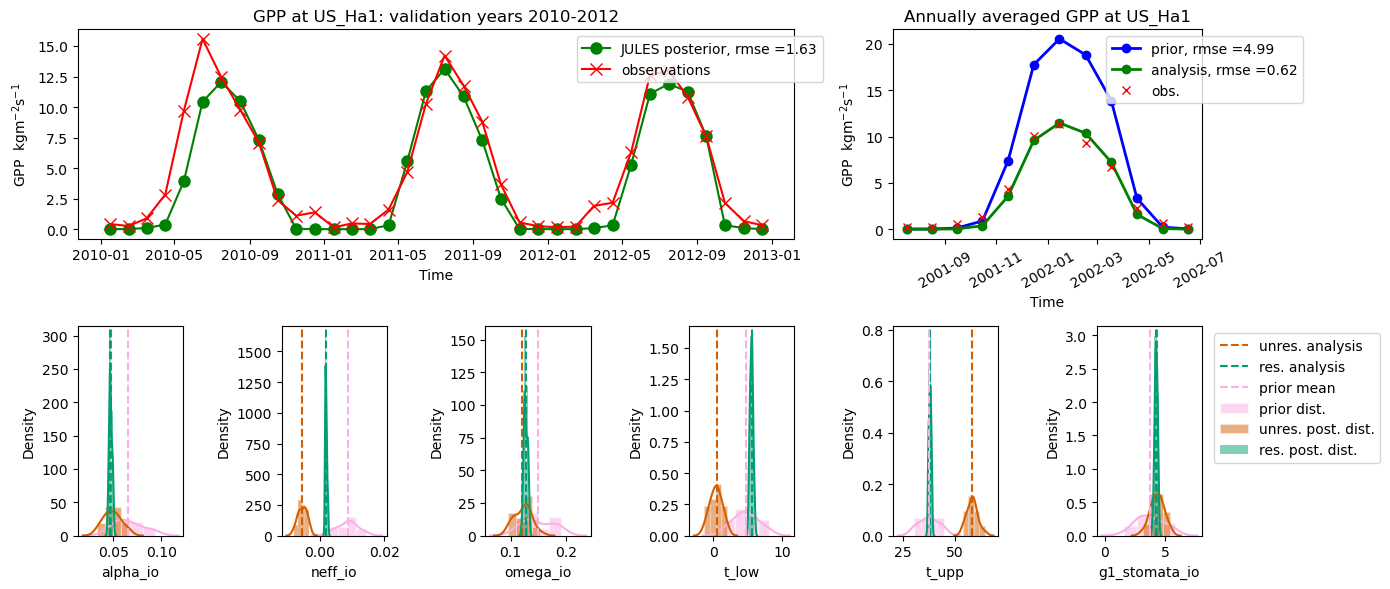

In [6]:
valid_y=y_cube.extract(iris.Constraint(year=validyears))
hxa_cube=iris.load_cube(filepath+'hxa_cube_'+obs_tag+'_US_Ha1_DAwithGPP_outputofGPP_20_gammaval'+str(GAMMAVAL)+'_1992-2009.nc')
valid_hxa=hxa_cube.extract(iris.Constraint(year=validyears))
rmse_posterior_valid=RMSE(valid_y.data,valid_hxa.data)

fig = plt.figure(figsize=(14,6))
plt.subplot2grid((2,6),(0,0),colspan=4)
for i in range(0,nens):
    hX_cube=iris.load_cube(filepath+'hX_cube_US_Ha1_GPP_ens'+str(i)+'_20.nc')
    #hXa_cube=iris.load_cube(filepath+'hXa_cube_'+obs_tag+'_US_Ha1_DAwithGPP_outputofGPP_20_gammaval'+str(GAMMAVAL)+'_1992-2009.nc')
    limited_hX=hX_cube.extract(iris.Constraint(year=years))
    #limited_hXa=hXa_cube.extract(iris.Constraint(year=years))

qplt.plot(valid_hxa,'go-',markersize=8,label='JULES posterior, rmse ='+"{:.2f}".format(rmse_posterior_valid))
qplt.plot(valid_y,'rx-',label='observations',markersize=8)
plt.xlabel('Time')
plt.ylabel('GPP '+' '+output_unit)
plt.title('GPP at US_Ha1: validation years 2010-2012')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')

aggvariable='month'
hxbar_average=hxbar_cube.aggregated_by(aggvariable,iris.analysis.MEAN)
y_average=y_cube.aggregated_by(aggvariable,iris.analysis.MEAN)
hxa_average=hxa_cube.aggregated_by(aggvariable,iris.analysis.MEAN)
rmse_prior_average=RMSE(y_average.data,hxbar_average.data)
rmse_analysis_average=RMSE(y_average.data,hxa_average.data)
plt.subplot2grid((2,6),(0,4),colspan=2)
qplt.plot(hxbar_average,'bo-',label='prior, rmse ='+"{:.2f}".format(rmse_prior_average),linewidth=2)
qplt.plot(hxa_average,'go-',label='analysis, rmse ='+"{:.2f}".format(rmse_analysis_average),linewidth=2)
qplt.plot(y_average,'rx',label='obs.',linewidth=2)
plt.xticks(rotation =30) 
plt.title('Annually averaged GPP at US_Ha1')
plt.ylabel('GPP '+' '+output_unit)
plt.legend(bbox_to_anchor=(1.35, 1.0), loc='upper right')

weights = np.ones(nens) / float(nens)
palette=sns.color_palette("colorblind", 11)
for i in range(0,6):
    plt.subplot2grid((2,6),(1,i))
    sns.histplot(Xb[i,:], kde=True, color=palette[6], stat='density',kde_kws=dict(cut=3),edgecolor=(1, 1, 1, .4),bins=4,label='prior dist.')
    if obs_tag == 'realobs':
        sns.histplot(Xa_orig[i,:], kde=True, color=palette[3], stat='density',kde_kws=dict(cut=3),edgecolor=(1, 1, 1, .4),bins=4,label='unres. post. dist.')
        plt.axvline(xa_orig[i], color=palette[3], linestyle='--',label='unres. analysis') 
        sns.histplot(Xa[i,:], kde=True, color=palette[2], stat='density',kde_kws=dict(cut=3),edgecolor=(1, 1, 1, .4),bins=4,label='res. post. dist.')
        plt.axvline(xa[i], color=palette[2], linestyle='--',label='res. analysis') 
    plt.axvline(xbar[i], color=palette[6], linestyle='--',label='prior mean') 
    if obs_tag=='twin':
        sns.histplot(Xa[i,:], kde=True, color=palette[2], stat='density',kde_kws=dict(cut=3),edgecolor=(1, 1, 1, .4),bins=4,label='post. dist.')
        plt.axvline(xa[i], color=palette[2], linestyle='--',label='analysis') 
        plt.axvline(true_params[i], color='k', linestyle='--',label='truth') 
    plt.xlabel(parameter_names[i])
    if i==5:
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()    
plt.tight_layout()

#plt.savefig('/gws/nopw/j04/jules/ndouglas/FluxNet/u-dr501/plots/posterior_results.png')

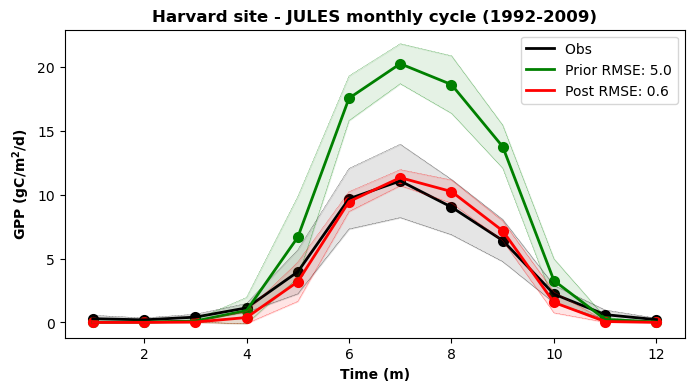

In [7]:

obs=y_cube.data
prior=hxbar_cube.data
post=hxa_cube.data
tstep=pd.date_range("1992-01-01", periods=len(obs),freq='1M')

t=np.arange(12)+1
m_obs=xr.DataArray(obs).rename({'dim_0':'time'}).assign_coords({'time':tstep}).sel(time=slice("1992","2009"))
m_prior=xr.DataArray(prior).rename({'dim_0':'time'}).assign_coords({'time':tstep}).sel(time=slice("1992","2009"))
m_post=xr.DataArray(post).rename({'dim_0':'time'}).assign_coords({'time':tstep}).sel(time=slice("1992","2009"))
plt.figure(figsize=(8,4))
se_obs=m_obs.groupby("time.month").mean("time")
se_prior=m_prior.groupby("time.month").mean("time")
se_post=m_post.groupby("time.month").mean("time")

m=m_obs
c='black'
plt.plot(t,m.groupby("time.month").mean("time"),color=c,lw=2,label='Obs ')
plt.plot(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.plot(t,m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.fill_between(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,alpha=0.1)
plt.scatter(t,m.groupby("time.month").mean("time"),color=c,lw=2,)


m=m_prior
c='green'
plt.plot(t,m.groupby("time.month").mean("time"),color=c,lw=2,label=f'Prior RMSE: {round(np.sqrt(np.mean((se_obs.data - se_prior.data)**2)),2)}')
plt.plot(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.plot(t,m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.fill_between(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,alpha=0.1)
plt.scatter(t,m.groupby("time.month").mean("time"),color=c,lw=2,)


m=m_post
c='red'
plt.plot(t,m.groupby("time.month").mean("time"),color=c,lw=2,label=f'Post RMSE: {round(np.sqrt(np.mean((se_obs.data - se_post.data)**2)),2)}')
plt.plot(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.plot(t,m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.fill_between(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,alpha=0.1)
plt.scatter(t,m.groupby("time.month").mean("time"),color=c,lw=2,)


plt.legend()
plt.ylabel(fr'GPP ($\bf gC/m^2/d$)',fontweight='bold')
plt.xlabel(fr'Time (m)' ,fontweight='bold')
plt.title('Harvard site - JULES monthly cycle (1992-2009)',fontweight='bold')
plt.savefig(filepath_plots+'JULESmonthlycycle.pdf',bbox_inches='tight')
plt.savefig('/home/users/ndouglas/roses/u-dr501/bin/JULESmonthlycycle.pdf',bbox_inches='tight')


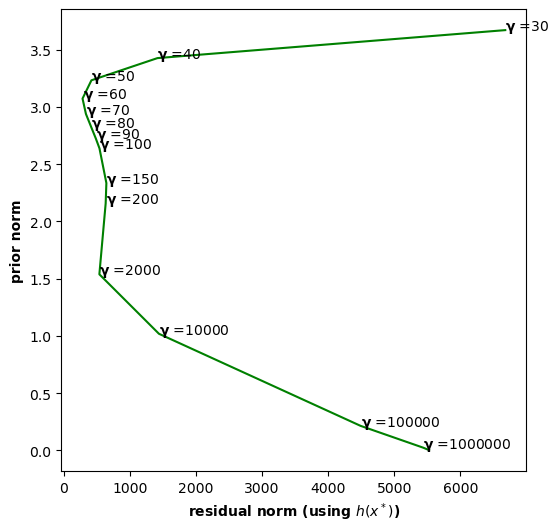

In [8]:
prior_norm_w=np.load('/home/users/ndouglas/roses/u-dr501/bin/wTw.npy')
fig = plt.figure(figsize=(6,6))
plt.plot(residual_norm,prior_norm_w,label='JULES',color='green')
#plt.xscale('log')
for i in range(0,len(SIZESofGAMMA)-1):                                     # <--
    plt.annotate(r'${\bf \gamma}$ =%s' % SIZESofGAMMA[i], xy=(residual_norm[i],prior_norm_w[i]), textcoords='data') # <--
plt.xlabel(r'residual norm (using $h(x^*)$)',fontweight='bold')
plt.ylabel('prior norm',fontweight='bold')
plt.savefig('/home/users/ndouglas/roses/u-dr501/bin/hxa.png')